# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_sinasc = pd.read_csv('b1abb33c4f.csv')

df_sinasc.head(5)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
df_sinasc['CATAPGAR5'] = np.where(
    df_sinasc['APGAR5'] < 4, 'asfixia grave',
    np.where(df_sinasc['APGAR5'] < 6, 'asfixia moderada',
             np.where(df_sinasc['APGAR5'] < 8, 'asfixia leve', 'normal'
                      ))
)

df_sinasc.head(5)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,CATAPGAR5
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

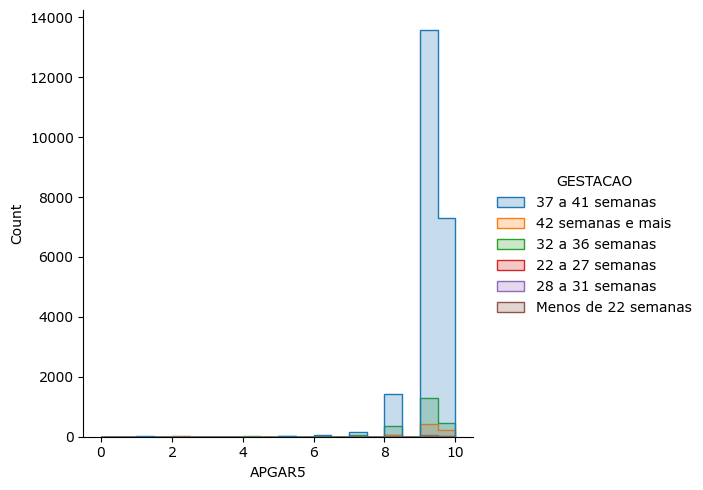

In [4]:
sns.displot(data = df_sinasc
            ,x = 'APGAR5'
            ,hue = 'GESTACAO'
            ,bins = 20
            ,element = 'step'
           )

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

<function matplotlib.pyplot.show(close=None, block=None)>

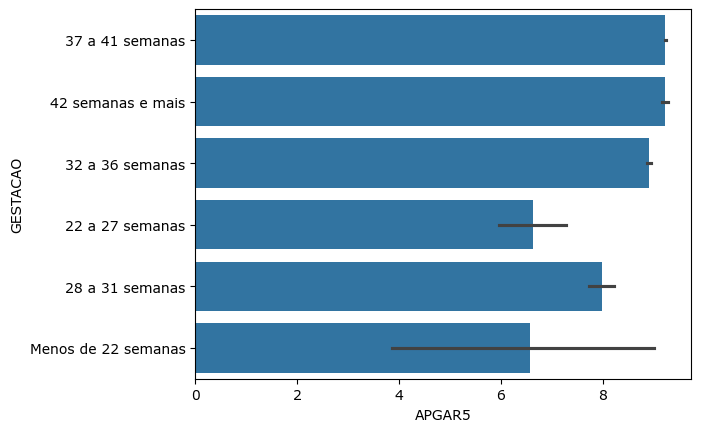

In [ ]:
sns.barplot(data=df_sinasc, x='APGAR5', y='GESTACAO')

plt.show


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [10]:
cross_sinasc = pd.crosstab(df_sinasc['APGAR5'], df_sinasc['GESTACAO']).reset_index()

cross_sinasc.head(5)

GESTACAO,APGAR5,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
0,0.0,7,0,2,5,1,1
1,1.0,0,0,2,20,0,0
2,2.0,8,2,2,3,0,1
3,3.0,6,1,2,5,0,0
4,4.0,1,5,8,7,0,0


In [12]:
perc_sinasc = (cross_sinasc.div(cross_sinasc.sum(axis=1), axis=0) * 100).round(2)

perc_sinasc.head(5)

GESTACAO,APGAR5,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
0,0.00,43.75,0.00,12.50,31.25,6.25,6.25
1,4.35,0.00,0.00,8.70,86.96,0.00,0.00
2,11.11,44.44,11.11,11.11,16.67,0.00,5.56
3,17.65,35.29,5.88,11.76,29.41,0.00,0.00
4,16.00,4.00,20.00,32.00,28.00,0.00,0.00


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

In [48]:
col_prematuros = ['22 a 27 semanas', '28 a 31 semanas', '32 a 36 semanas']

perc_sinasc['PREMATURO'] = perc_sinasc[col_prematuros].sum(axis=1)

perc_sinasc.head(5)

GESTACAO,APGAR5,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas,PREMATURO
0,0.00,43.75,0.00,12.50,31.25,6.25,6.25,56.25
1,4.35,0.00,0.00,8.70,86.96,0.00,0.00,8.70
2,11.11,44.44,11.11,11.11,16.67,0.00,5.56,66.66
3,17.65,35.29,5.88,11.76,29.41,0.00,0.00,52.93
4,16.00,4.00,20.00,32.00,28.00,0.00,0.00,56.00


In [55]:
df_rel_prematuro = pd.concat([cross_sinasc[['APGAR5']], perc_sinasc[['PREMATURO']]], axis= 1)

df_rel_prematuro.head(5)

GESTACAO,APGAR5,PREMATURO
0,0.0,56.25
1,1.0,8.70
2,2.0,66.66
3,3.0,52.93
4,4.0,56.00


<Axes: xlabel='PREMATURO', ylabel='APGAR5'>

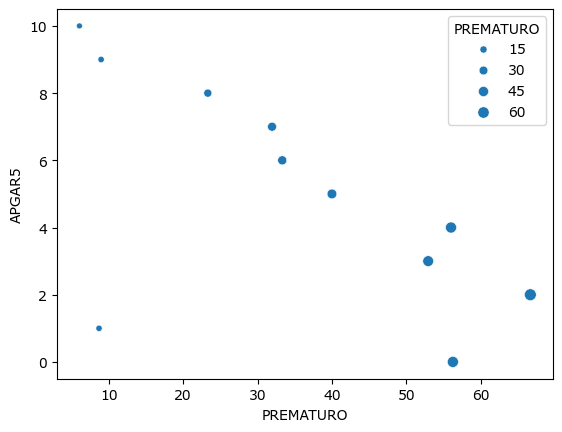

In [58]:
sns.scatterplot(x = 'PREMATURO'
                , y = 'APGAR5'
                , data = df_rel_prematuro
                , size = 'PREMATURO'
               )

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [ ]:
#Inverti a ordem de grandeza do APGAR5 para destacar os resultados mais baixo no scatterplot

df_sinasc['RELAPGAR5'] = np.where(
    df_sinasc['APGAR5'] < 1, 10,
    np.where(df_sinasc['APGAR5'] < 2, 9,
             np.where(df_sinasc['APGAR5'] < 3, 8,
                      np.where(df_sinasc['APGAR5'] < 4, 7,
                               np.where(df_sinasc['APGAR5'] < 5, 6,
                                        np.where(df_sinasc['APGAR5'] < 6, 5,
                                                 np.where(df_sinasc['APGAR5'] < 7, 4,
                                                          np.where(df_sinasc['APGAR5'] < 8, 3,
                                                                   np.where(df_sinasc['APGAR5'] < 9, 2,
                                                                        np.where(df_sinasc['APGAR5'] < 10, 1, 0
))))))))))

df_sinasc.head(5)


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,CATAPGAR5,RELAPGAR5
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal,0
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal,1
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal,0
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal,0
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal,0


<Axes: xlabel='IDADEMAE', ylabel='PESO'>

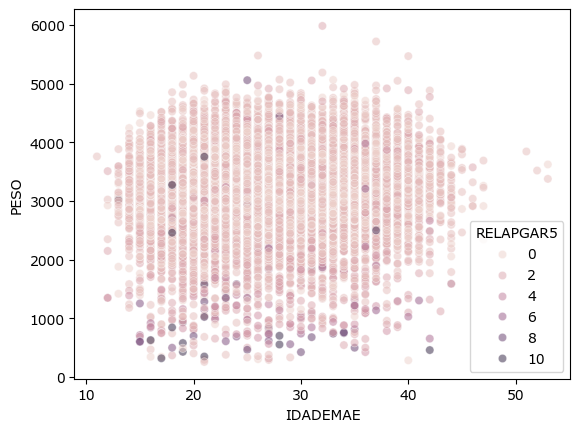

In [45]:
sns.scatterplot(x = 'IDADEMAE'
                , y = 'PESO'
                , data = df_sinasc
                , alpha = .5
                , hue= 'RELAPGAR5'
               )

In [43]:
relacao_peso = (df_sinasc['PESO'] < 1501).sum()

relacao_apgar5 = df_sinasc['CATAPGAR5'].isin(['asfixia moderada', 'afixia grave']).sum()

qtde_peso_apgar = len(df_sinasc[(df_sinasc['PESO'] < 1501) & df_sinasc['CATAPGAR5'].isin(['asfixia moderada', 'asfixia grave'])])

perc_mod_grave = (qtde_peso_apgar / relacao_apgar5).round(2)
 
print(f'Temos {relacao_peso} bebes com menos de 1500 gramas, destes {qtde_peso_apgar} nasceram com asfixia moderada ou grave de um total de {relacao_apgar5} do dataframe, o que representa {perc_mod_grave} deste universo.')


Temos 308 bebes com menos de 1500 gramas, destes 52 nasceram com asfixia moderada ou grave de um total de 68 do dataframe, o que representa 0.76 deste universo.
